In [2]:
import pandas as pd

In [3]:
DF=pd.read_csv('./data/decade.csv',header=None)
DF

,0,1,2,3,4,5,6,7,8,9,10
0,고양오리온스,24/46,3/14,23/26,1/1,12,15,23,7,5,18
1,서울삼성,22/47,4/20,9/12,1/1,12,13,20,4,3,27
2,안양 KGC,28/49,2/11,9/16,3/3,14,10,20,3,4,16
3,인천전자랜드,25/45,6/16,5/5,1/1,15,6,23,4,2,22
4,울산모비스,23/40,5/15,13/16,0,22,9,20,7,3,19
...,...,...,...,...,...,...,...,...,...,...,...
7443,대구 한국가스공사,25/45,6/13,16/24,1/1,12,10,28,4,0,19
7444,울산 현대모비스,21/44,5/23,11/15,0,16,9,25,7,2,16
7445,안양 KGC,23/46,9/25,4/7,1/1,20,10,33,4,5,19
7446,원주 DB,33/54,7/15,15/20,3/3,22,10,27,9,1,17


In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7448 entries, 0 to 7447
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7448 non-null   object
 1   1       7448 non-null   object
 2   2       7448 non-null   object
 3   3       7448 non-null   object
 4   4       7448 non-null   object
 5   5       7448 non-null   int64 
 6   6       7448 non-null   int64 
 7   7       7448 non-null   int64 
 8   8       7448 non-null   int64 
 9   9       7448 non-null   int64 
 10  10      7448 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 640.2+ KB


In [5]:
DF.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

### 머신러닝에 필요한 새로운 컬럼 생성

In [6]:
name = ['2점','3점','자유투']
for j in range(1,4):
    sucessList = []
    tryList = []
    sucessRate = []
    for i in range(len(DF.iloc[:,j])):
        score = DF.iloc[:,j][i].split('/')
        if len(score) == 2:
            sucessList.append(int(score[0]))
            tryList.append(int(score[1]))
            sucessRate.append(round(int(score[0])/int(score[1]),3))
        else:
            sucessList.append(0)
            tryList.append(0)
            sucessRate.append(0)

    DF[f'{name[j-1]}_성공수'] = sucessList
    DF[f'{name[j-1]}_시도수'] = tryList
    DF[f'{name[j-1]}_성공률'] = sucessRate



In [7]:
DF

,0,1,2,3,4,5,6,7,8,9,10,2점_성공수,2점_시도수,2점_성공률,3점_성공수,3점_시도수,3점_성공률,자유투_성공수,자유투_시도수,자유투_성공률
0,고양오리온스,24/46,3/14,23/26,1/1,12,15,23,7,5,18,24,46,0.522,3,14,0.214,23,26,0.885
1,서울삼성,22/47,4/20,9/12,1/1,12,13,20,4,3,27,22,47,0.468,4,20,0.200,9,12,0.750
2,안양 KGC,28/49,2/11,9/16,3/3,14,10,20,3,4,16,28,49,0.571,2,11,0.182,9,16,0.562
3,인천전자랜드,25/45,6/16,5/5,1/1,15,6,23,4,2,22,25,45,0.556,6,16,0.375,5,5,1.000
4,울산모비스,23/40,5/15,13/16,0,22,9,20,7,3,19,23,40,0.575,5,15,0.333,13,16,0.812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7443,대구 한국가스공사,25/45,6/13,16/24,1/1,12,10,28,4,0,19,25,45,0.556,6,13,0.462,16,24,0.667
7444,울산 현대모비스,21/44,5/23,11/15,0,16,9,25,7,2,16,21,44,0.477,5,23,0.217,11,15,0.733
7445,안양 KGC,23/46,9/25,4/7,1/1,20,10,33,4,5,19,23,46,0.500,9,25,0.360,4,7,0.571
7446,원주 DB,33/54,7/15,15/20,3/3,22,10,27,9,1,17,33,54,0.611,7,15,0.467,15,20,0.750


In [8]:
DF=DF.drop(DF.iloc[:,:5],axis=1)

In [9]:
DF=DF.rename(columns={5:'어시스트',6:'공격 리바운드',7:'수비 리바운드',8:'스틸',9:'블록슛',10:'파울'})

In [10]:
DF

,어시스트,공격 리바운드,수비 리바운드,스틸,블록슛,파울,2점_성공수,2점_시도수,2점_성공률,3점_성공수,3점_시도수,3점_성공률,자유투_성공수,자유투_시도수,자유투_성공률
0,12,15,23,7,5,18,24,46,0.522,3,14,0.214,23,26,0.885
1,12,13,20,4,3,27,22,47,0.468,4,20,0.200,9,12,0.750
2,14,10,20,3,4,16,28,49,0.571,2,11,0.182,9,16,0.562
3,15,6,23,4,2,22,25,45,0.556,6,16,0.375,5,5,1.000
4,22,9,20,7,3,19,23,40,0.575,5,15,0.333,13,16,0.812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7443,12,10,28,4,0,19,25,45,0.556,6,13,0.462,16,24,0.667
7444,16,9,25,7,2,16,21,44,0.477,5,23,0.217,11,15,0.733
7445,20,10,33,4,5,19,23,46,0.500,9,25,0.360,4,7,0.571
7446,22,10,27,9,1,17,33,54,0.611,7,15,0.467,15,20,0.750


### target 생성

In [11]:
total=[]
target=[]

for i in range(len(DF)):
    two_=DF.iloc[i][6]*2
    three_=DF.iloc[i][9]*3
    one_=DF.iloc[i][12]*1
    total_=two_+three_+one_
    total.append(total_)


for i in range(0,len(total),2):
    if total[i]> total[i+1]:
        target.append(1)
        target.append(0)
    else:
        target.append(0)
        target.append(1)

In [12]:
DF['target']=target

In [13]:
DF

,어시스트,공격 리바운드,수비 리바운드,스틸,블록슛,파울,2점_성공수,2점_시도수,2점_성공률,3점_성공수,3점_시도수,3점_성공률,자유투_성공수,자유투_시도수,자유투_성공률,target
0,12,15,23,7,5,18,24,46,0.522,3,14,0.214,23,26,0.885,1
1,12,13,20,4,3,27,22,47,0.468,4,20,0.200,9,12,0.750,0
2,14,10,20,3,4,16,28,49,0.571,2,11,0.182,9,16,0.562,0
3,15,6,23,4,2,22,25,45,0.556,6,16,0.375,5,5,1.000,1
4,22,9,20,7,3,19,23,40,0.575,5,15,0.333,13,16,0.812,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7443,12,10,28,4,0,19,25,45,0.556,6,13,0.462,16,24,0.667,1
7444,16,9,25,7,2,16,21,44,0.477,5,23,0.217,11,15,0.733,0
7445,20,10,33,4,5,19,23,46,0.500,9,25,0.360,4,7,0.571,1
7446,22,10,27,9,1,17,33,54,0.611,7,15,0.467,15,20,0.750,1


c:\Users\KDP-48\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

c:\Users\KDP-48\anaconda3\envs\MY_PYTHON\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\KDP-48\anaconda3\envs\MY_PYTHON\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


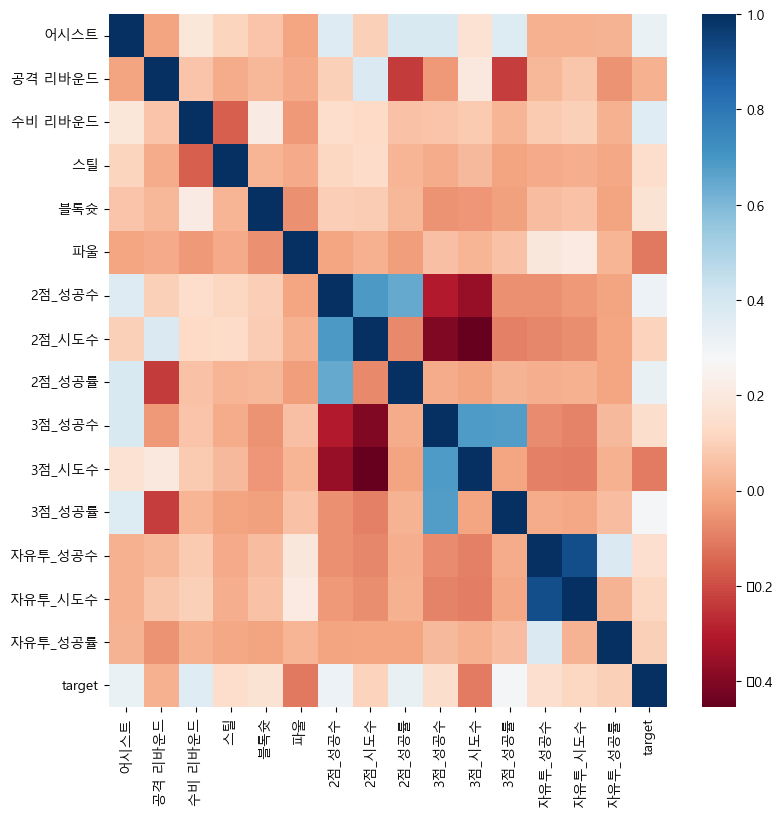

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

# 히트맵
plt.figure(figsize=(9,9))
sns.heatmap(DF.corr(),cmap='RdBu')

In [15]:
DF.corr().target

어시스트       0.321864
공격 리바운드    0.015518
수비 리바운드    0.361110
스틸         0.136713
블록슛        0.169899
파울        -0.109661
2점_성공수     0.317306
2점_시도수     0.102271
2점_성공률     0.324291
3점_성공수     0.145120
3점_시도수    -0.106904
3점_성공률     0.288890
자유투_성공수    0.152621
자유투_시도수    0.118734
자유투_성공률    0.099999
target     1.000000
Name: target, dtype: float64

<Axes: >

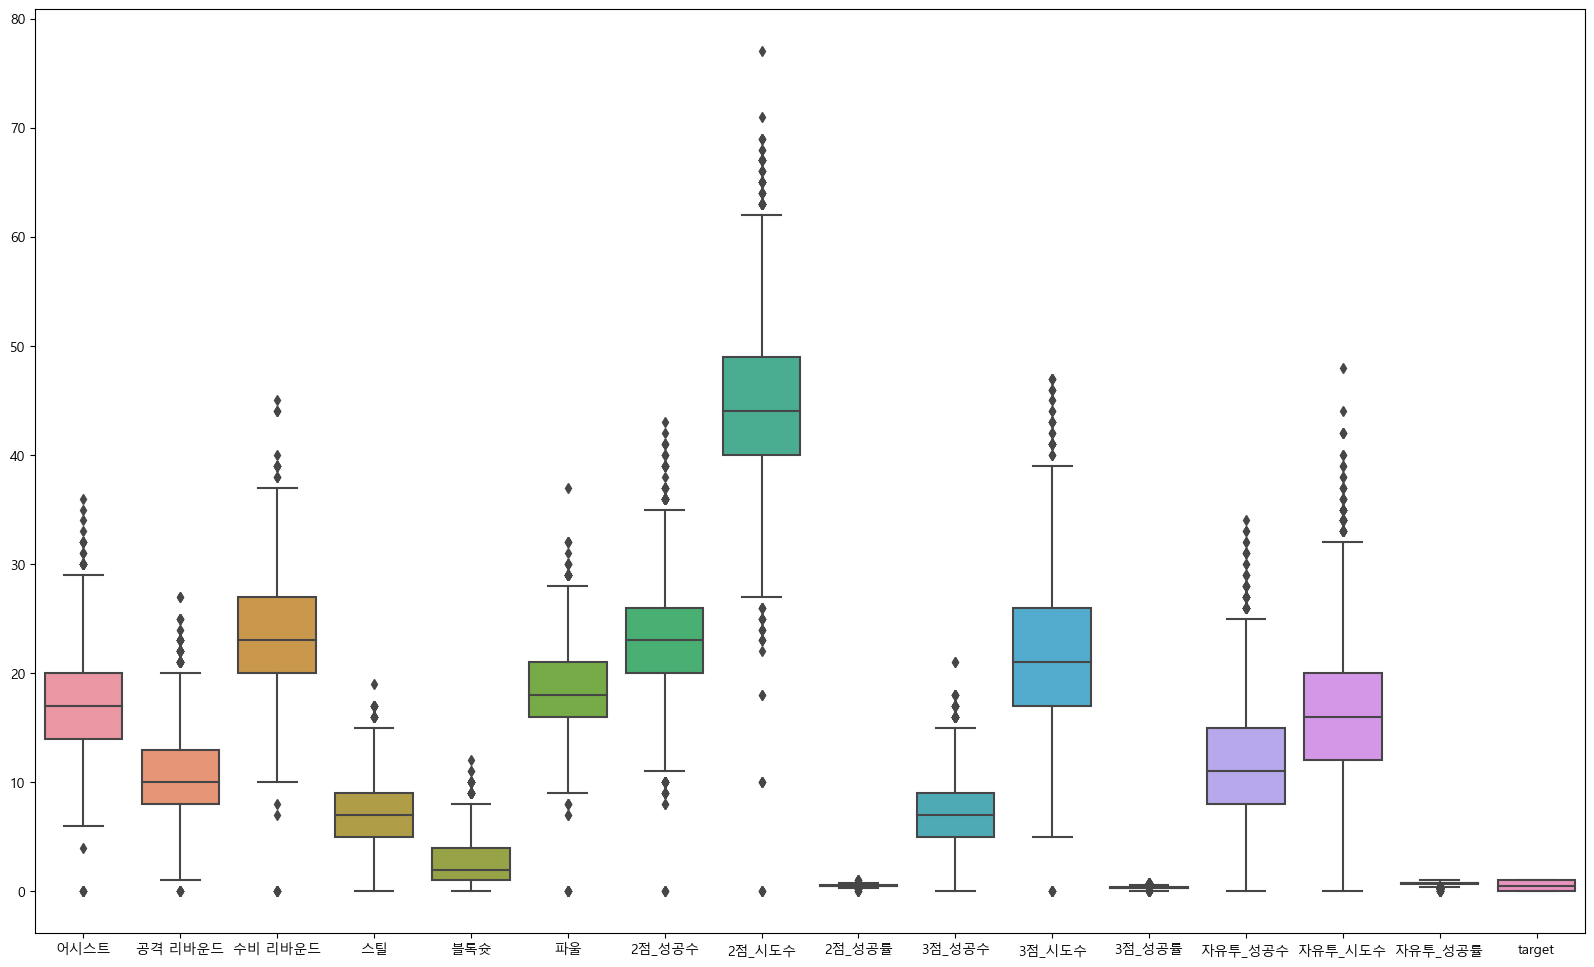

In [16]:
plt.figure(figsize=(20,12))
sns.boxplot(DF)

# 상관관계, 중요도로 피쳐 뽑기

- feature 고르면?
    * RandomForest
    * PCA
    * Corr

In [18]:
from sklearn.model_selection import train_test_split

featureDF=DF.iloc[:,:-1]
targetDF=DF.iloc[:,-1]

# train, test 분리
train_X,test_X,train_Y,test_Y=train_test_split(featureDF,targetDF,test_size=0.2, random_state=10)
train_X, val_X, train_Y, val_Y=train_test_split(train_X,train_Y,test_size=0.1,random_state=10)


In [19]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()

scale.fit(train_X)

test_X_scaled=scale.transform(test_X)
train_X_scaled=scale.transform(train_X)
val_X_scaled=scale.transform(val_X)


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
tree=DecisionTreeClassifier()

tree.fit(train_X_scaled,train_Y)

importance=tree.feature_importances_

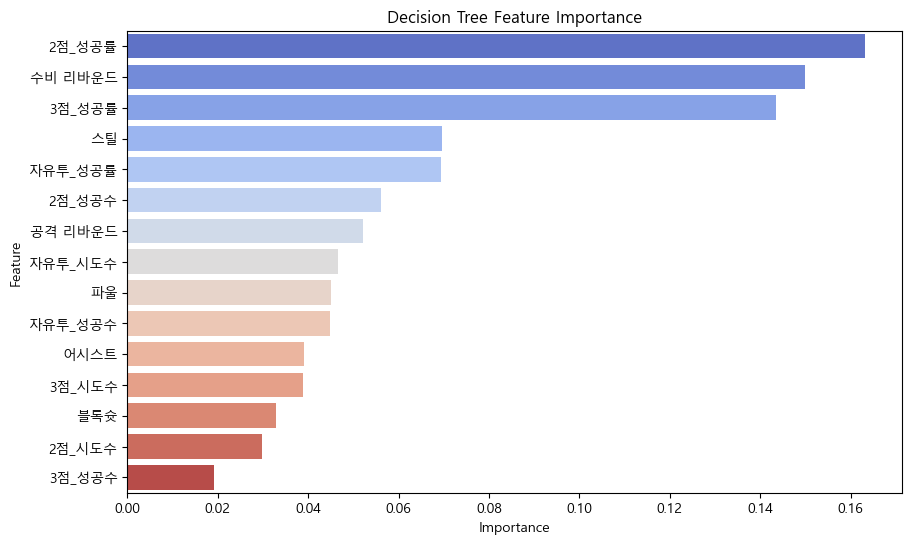

In [22]:
df_importance = pd.DataFrame({'Feature': DF.columns[:-1], 'Importance': importance})
df_importance.sort_values('Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(y='Feature', x='Importance', data=df_importance,palette='coolwarm')

plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [23]:
DF.corr().target.sort_values(ascending=False)

target     1.000000
수비 리바운드    0.361110
2점_성공률     0.324291
어시스트       0.321864
2점_성공수     0.317306
3점_성공률     0.288890
블록슛        0.169899
자유투_성공수    0.152621
3점_성공수     0.145120
스틸         0.136713
자유투_시도수    0.118734
2점_시도수     0.102271
자유투_성공률    0.099999
공격 리바운드    0.015518
3점_시도수    -0.106904
파울        -0.109661
Name: target, dtype: float64

In [24]:
# 수비 리바운드, 2점 성공률, 3점 성공률, 어시스트를 feature로 target을 target으로 머신러닝 분석